In [ ]:
!pip install rdflib

In [1]:
from rdflib import Graph, Namespace, RDF, RDFS, XSD
import networkx as nx
import matplotlib.pyplot as plt

## Start to define the TBox

In [2]:
g = Graph()
pub = Namespace("http://www.example.org/publication#")
g.bind("pub", pub)

Here we will define the class and the subclass of the schema

In [3]:
# Class
g.add((pub.Author, RDF.type, RDFS.Class))
g.add((pub.Publication, RDF.type, RDFS.Class))
g.add((pub.Review, RDF.type, RDFS.Class))
g.add((pub.Topic, RDF.type, RDFS.Class))
g.add((pub.Event, RDF.type, RDFS.Class))
g.add((pub.Reviewer, RDF.type, RDFS.Class))
g.add((pub.ReviewerBoard, RDF.type, RDFS.Class))
g.add((pub.Editor, RDF.type, RDFS.Class))
g.add((pub.ConferenceChair, RDF.type, RDFS.Class))
g.add((pub.JournalEditor, RDF.type, RDFS.Class))

# Subclass
g.add((pub.Reviewer, RDFS.subClassOf, pub.Author))
g.add((pub.ReviewerBoard, RDFS.subClassOf, pub.Reviewer))
g.add((pub.Editor, RDFS.subClassOf, pub.ReviewerBoard))
g.add((pub.ConferenceChair, RDFS.subClassOf, pub.Editor))
g.add((pub.JournalEditor, RDFS.subClassOf, pub.Editor))




<Graph identifier=N17ceceafe3514d1eb6dc3512f4a7c2ab (<class 'rdflib.graph.Graph'>)>

In [8]:


# Property
g.add((pub.title, RDF.type, RDF.Property))
g.add((pub.title, RDFS.domain, pub.Publication))
g.add((pub.title, RDFS.range, XSD.string))

g.add((pub.abstract, RDF.type, RDF.Property))
g.add((pub.abstract, RDFS.domain, pub.Publication))
g.add((pub.abstract, RDFS.range, XSD.string))

g.add((pub.hasTopic, RDF.type, RDF.Property))
g.add((pub.hasTopic, RDFS.domain, pub.Publication))
g.add((pub.hasTopic, RDFS.range, pub.Topic))

g.add((pub.writes, RDF.type, RDF.Property))
g.add((pub.writes, RDFS.domain, pub.Author))
g.add((pub.writes, RDFS.range, pub.Publication))

g.add((pub.reviews, RDF.type, RDF.Property))
g.add((pub.reviews, RDFS.domain, pub.Reviewer))
g.add((pub.reviews, RDFS.range, pub.Publication))


g.add((pub.name, RDF.type, RDF.Property))
g.add((pub.name, RDFS.domain, pub.Author))
g.add((pub.name, RDFS.range, XSD.string))

g.add((pub.hIndex, RDF.type, RDF.Property))
g.add((pub.hIndex, RDFS.domain, pub.Author))
g.add((pub.hIndex, RDFS.range, XSD.int))

g.add((pub.presentedIn, RDF.type, RDF.Property))
g.add((pub.presentedIn, RDFS.domain, pub.Publication))
g.add((pub.presentedIn, RDFS.range, pub.Proceeding))

g.add((pub.publishedIn, RDF.type, RDF.Property))
g.add((pub.publishedIn, RDFS.domain, pub.Publication))
g.add((pub.publishedIn, RDFS.range, pub.Volume))

g.add((pub.proceedingBelongsToEvent, RDF.type, RDF.Property))
g.add((pub.proceedingBelongsToEvent, RDFS.domain, pub.Proceeding))
g.add((pub.proceedingBelongsToEvent, RDFS.range, pub.Event))

g.add((pub.volumeBelongsToJournal, RDF.type, RDF.Property))
g.add((pub.volumeBelongsToJournal, RDFS.domain, pub.Volume))
g.add((pub.volumeBelongsToJournal, RDFS.range, pub.Journal))

g.add((pub.year, RDF.type, RDF.Property))
g.add((pub.year, RDFS.domain, pub.Proceeding))
g.add((pub.year, RDFS.range, XSD.int))
g.add((pub.year, RDFS.domain, pub.Volume))
g.add((pub.year, RDFS.range, XSD.int))

g.add((pub.city, RDF.type, RDF.Property))
g.add((pub.city, RDFS.domain, pub.Proceeding))
g.add((pub.city, RDFS.range, XSD.string))
g.add((pub.city, RDFS.domain, pub.Volume))
g.add((pub.city, RDFS.range, XSD.string))

g.add((pub.cites, RDF.type, RDF.Property))
g.add((pub.cites, RDFS.domain, pub.Paper))  
g.add((pub.cites, RDFS.range, pub.Paper))

g.add((pub.assignedBy, RDF.type, RDF.Property))
g.add((pub.assignedBy, RDFS.domain, pub.Review))
g.add((pub.assignedBy, RDFS.range, pub.Editor))



<Graph identifier=N20640f98751e47e3a8f63f42530e051e (<class 'rdflib.graph.Graph'>)>

## Save in the file rdfs

In [9]:
g.serialize("tbox_lab.ttl", format="turtle")

<Graph identifier=N20640f98751e47e3a8f63f42530e051e (<class 'rdflib.graph.Graph'>)>

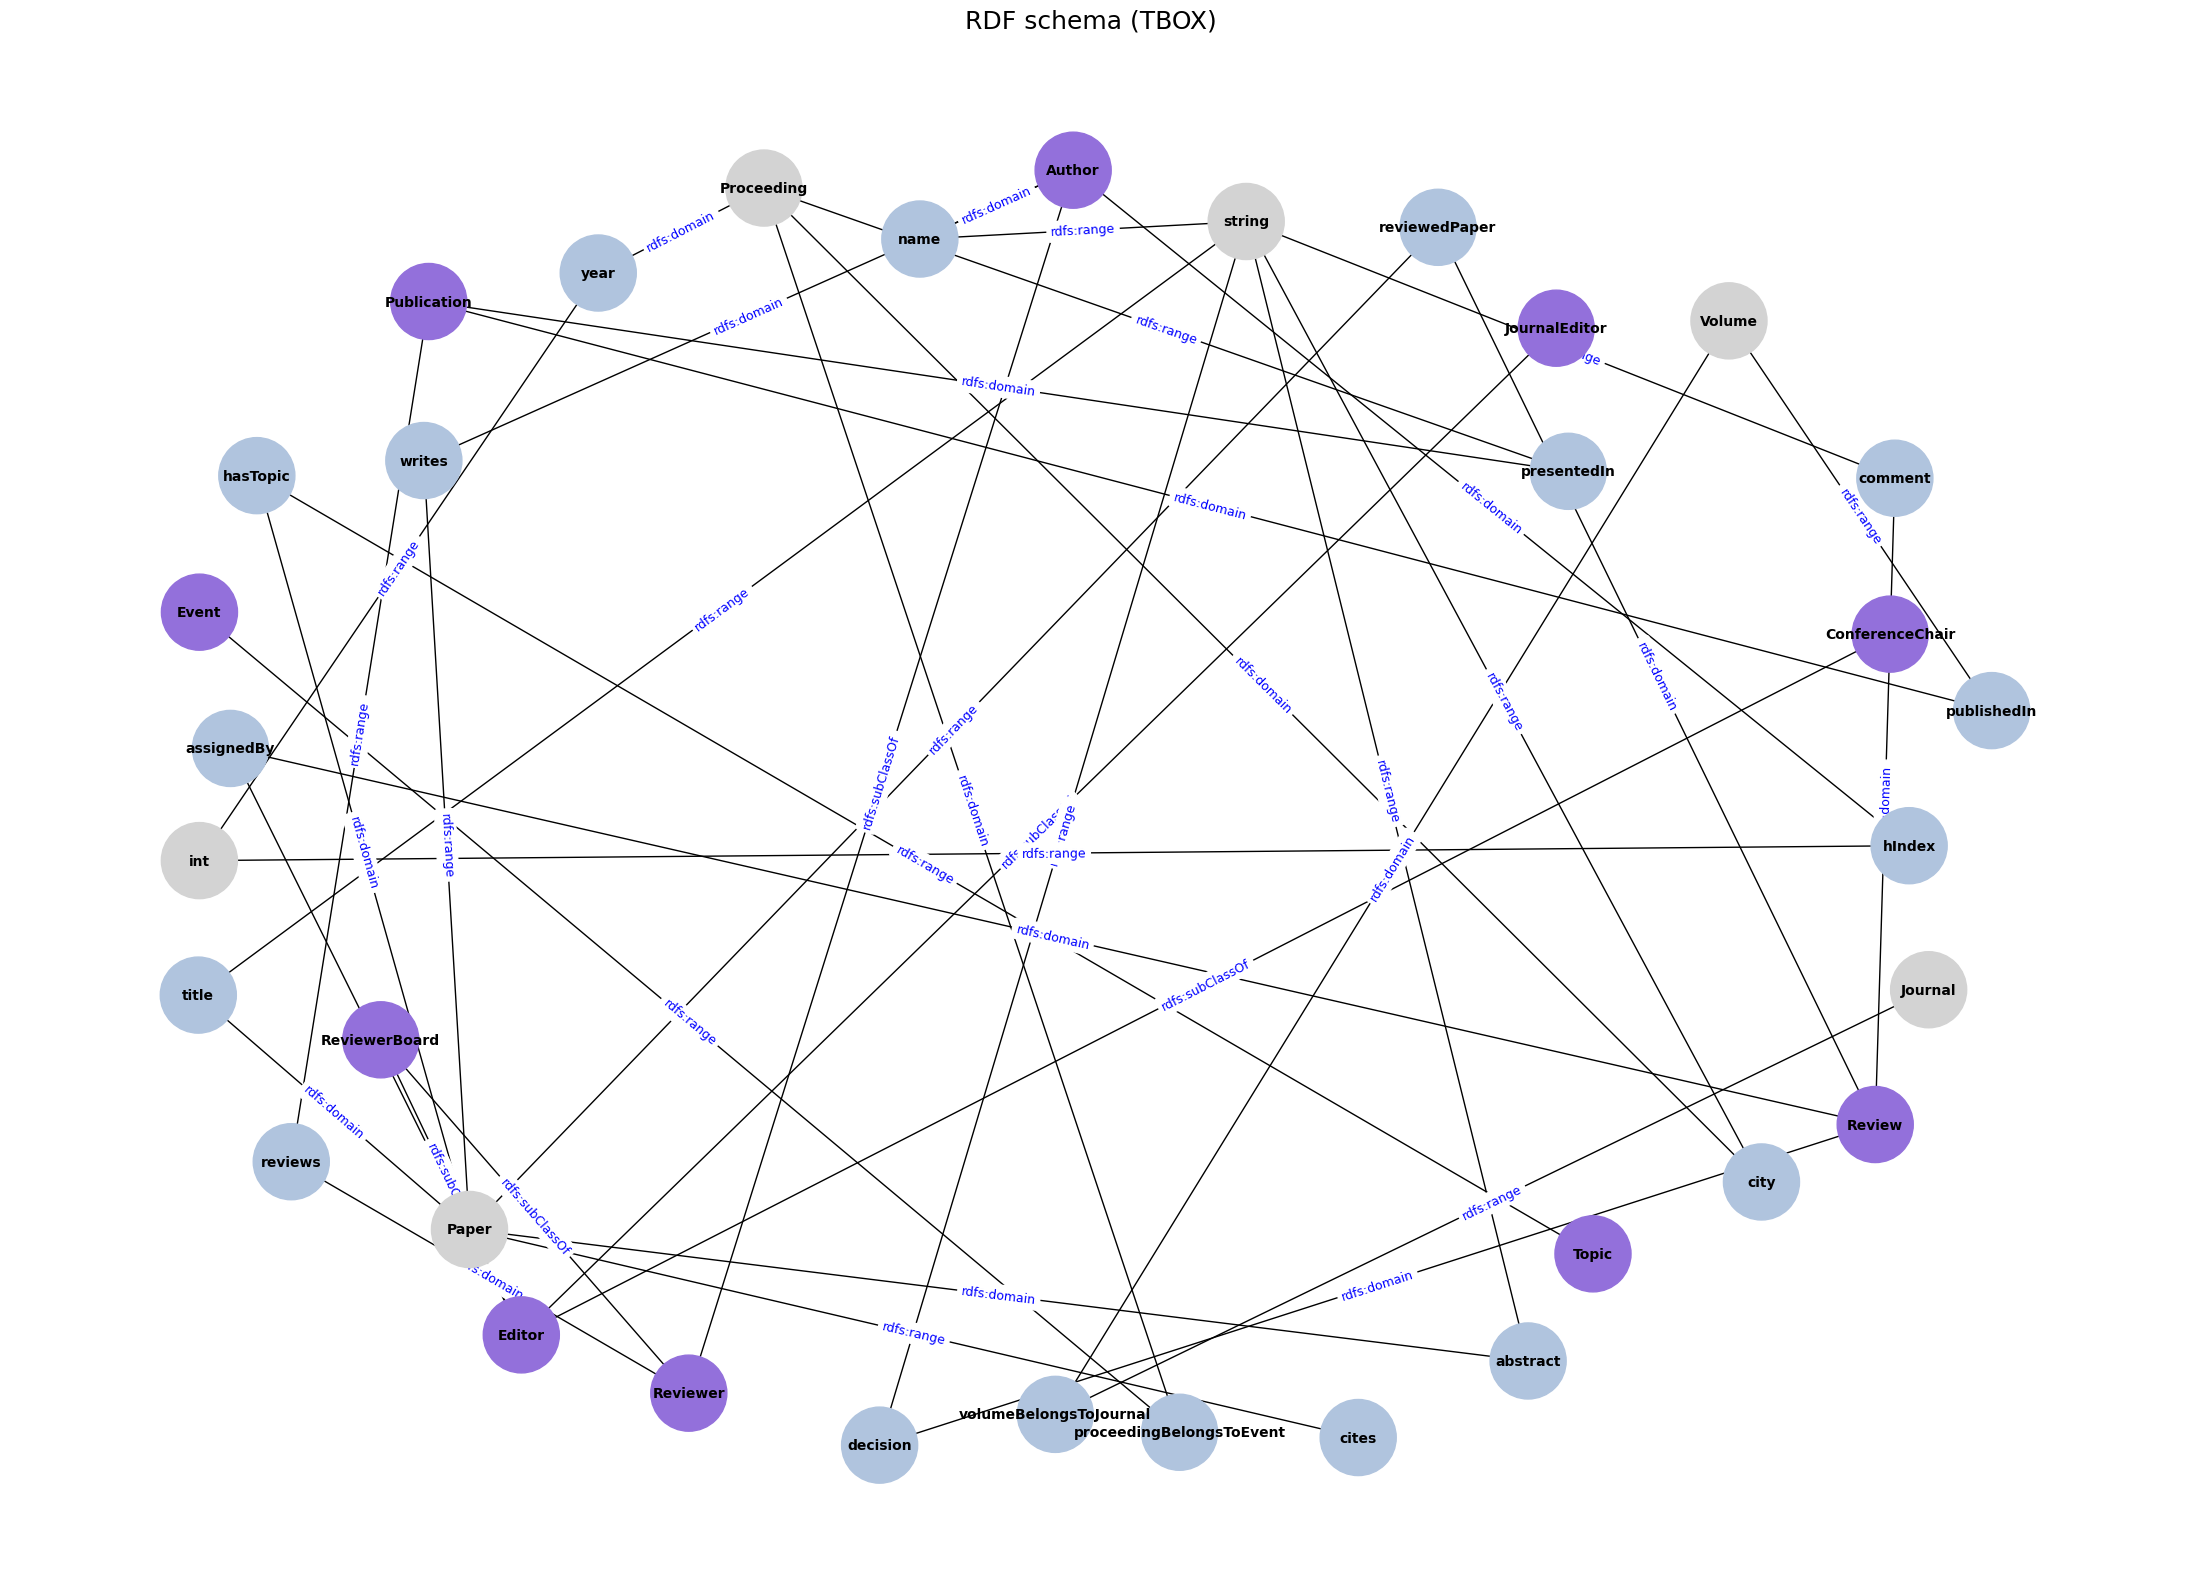

In [10]:
from rdflib import Graph, RDF, RDFS
import matplotlib.pyplot as plt
import networkx as nx

g = Graph()
g.parse("tbox_lab.ttl", format="turtle")

G = nx.DiGraph()

for s, _, _ in g.triples((None, RDF.type, RDFS.Class)):
    label = str(s).split("#")[-1]
    G.add_node(label, layer="Class", color="mediumpurple")

for s, _, _ in g.triples((None, RDF.type, RDF.Property)):
    domain = g.value(s, RDFS.domain)
    range_ = g.value(s, RDFS.range)
    if domain and range_:
        prop = str(s).split("#")[-1]
        domain_label = str(domain).split("#")[-1]
        range_label = str(range_).split("#")[-1]
        G.add_node(prop, layer="Property", color="lightsteelblue")
        G.add_edge(prop, domain_label, label="rdfs:domain")
        G.add_edge(prop, range_label, label="rdfs:range")

for subclass, _, superclass in g.triples((None, RDFS.subClassOf, None)):
    sub_label = str(subclass).split("#")[-1]
    super_label = str(superclass).split("#")[-1]
    G.add_node(sub_label, layer="Class", color="mediumpurple")
    G.add_node(super_label, layer="Class", color="mediumpurple")
    G.add_edge(sub_label, super_label, label="rdfs:subClassOf")

pos = nx.spring_layout(G, seed=42, k=2.5)
edge_labels = nx.get_edge_attributes(G, 'label')
node_colors = [G.nodes[n].get('color', 'lightgray') for n in G.nodes]

plt.figure(figsize=(22, 16))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=3000)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrows=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='blue', font_size=9)

plt.title("RDF schema (TBOX) ", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()



## First queries
### revelant auhtors

In [7]:
"""
PREFIX pub: <http://example.org/pub#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>

SELECT ?author ?hindex (MAX(?year) AS ?lastpublication) (MIN(?year) AS ?firstpublication)
WHERE {
  ?author a pub:Author ;
          pub:hIndex ?hindex ;
          pub:writes ?paper .
  
  {
    ?paper pub:presentedIn ?proceeding .
    ?proceeding pub:year ?year .
  }
  UNION
  {
    ?paper pub:publishedIn ?volume .
    ?volume pub:year ?year .
  }
}
GROUP BY ?author ?hindex
ORDER BY DESC(?hindex) DESC(?lastpublication) ASC (?firstpublication)
"""

'\nPREFIX pub: <http://example.org/pub#>\nPREFIX xsd: <http://www.w3.org/2001/XMLSchema#>\n\nSELECT ?author ?hindex (MAX(?year) AS ?lastpublication) (MIN(?year) AS ?firstpublication)\nWHERE {\n  ?author a pub:Author ;\n          pub:hIndex ?hindex ;\n          pub:writes ?paper .\n  \n  {\n    ?paper pub:presentedIn ?proceeding .\n    ?proceeding pub:year ?year .\n  }\n  UNION\n  {\n    ?paper pub:publishedIn ?volume .\n    ?volume pub:year ?year .\n  }\n}\nGROUP BY ?author ?hindex\nORDER BY DESC(?hindex) DESC(?lastpublication) ASC (?firstpublication)\n'